# K-Nearest Neighbors (KNN)

### Introduction
The K Nearest Neighbors (KNN) algorithm is an uncomplicated method that retains all available cases and categorizes new data or cases by means of a similarity measure. It is commonly employed to classify a datapoint by examining the classification of its nearest neighbors. KNN finds its applications in a broad range of areas, such as recommendation systems, anomaly detection, and image/text classification. While KNN can be utilized for regression, its use for this purpose is not as prevalent as it is for classification.


### Generalized Algorithm: 
1. Calculate the distance between test data and each row of training dataset.
2. Sort the calculated distances in ascending order based on distance values.
3. Get top k rows from the sorted array.
4. Get the most frequent class of these rows.
5. Return the predicted class.

### Advantages and Disadvantages

#### Advantages
- Easy to implement: Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.
- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

#### Disadvantages
- Does not scale well: Since KNN is a lazy algorithm, it takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective. More memory and storage will drive up business expenses and more data can take longer to compute. While different data structures, such as Ball-Tree, have been created to address the computational inefficiencies, a different classifier may be ideal depending on the business problem.

- Curse of dimensionality: The KNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. This is sometimes also referred to as the peaking phenomenon, where after the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.

- Prone to overfitting: Due to the “curse of dimensionality”, KNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data. 




### Application
In this part, we apply K-Nearest Neighbors algorithm on the red wine dataset, this dataset comes from UCI.

In [64]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [66]:
wine = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore
wine = datasets.load_wine()
X = wine.data
y = wine.target

/var/folders/_b/hcwjc0m51vz15mg59fc88h5r0000gn/T/ipykernel_95166/994139169.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  wine = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore


Firstly, we have a look at summary of our dataset. According to the result, we could see there is no missing data and the features are all positive.

In [34]:
print(pd.DataFrame(X).describe())

               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685   
std      0.998859    0.1244

We could determine the number of wine types in the dataset as well as the quantity of samples in each specific type. Based on the findings, it is evident that there are three variations of red wine, with 59, 71, and 71 samples respectively for each type.

In [38]:
print(Counter(y))

Counter({1: 71, 0: 59, 2: 48})


/var/folders/_b/hcwjc0m51vz15mg59fc88h5r0000gn/T/ipykernel_95166/37069454.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  wine1 = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore


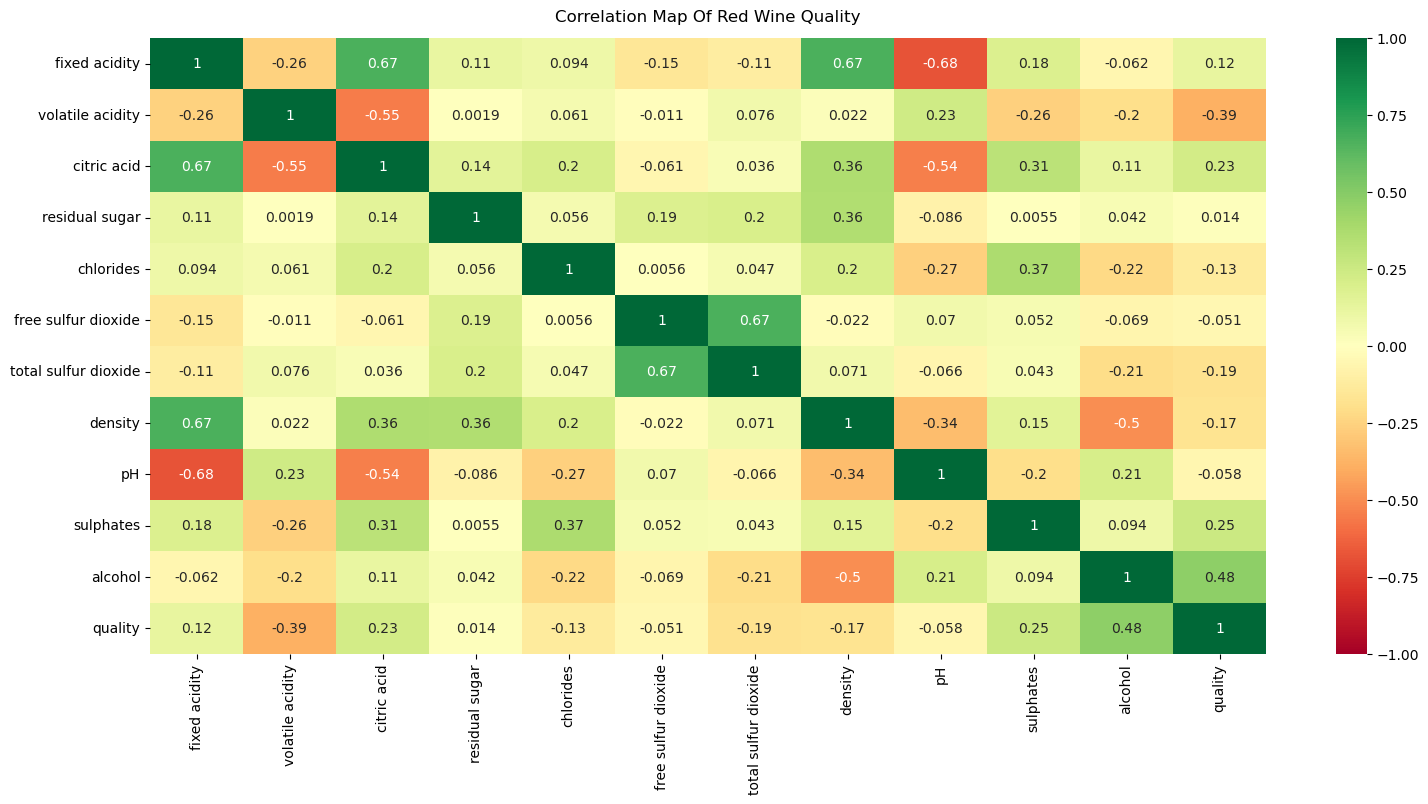

In [69]:
plt.figure(figsize=(18, 8))
wine1 = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore
sns.heatmap(wine1.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

We then visualized the first and second characteristics to see if there were any obvious clusters between the three wines. According to the plot, we could see that there exists three clusters, however, the boundaries are not clear.

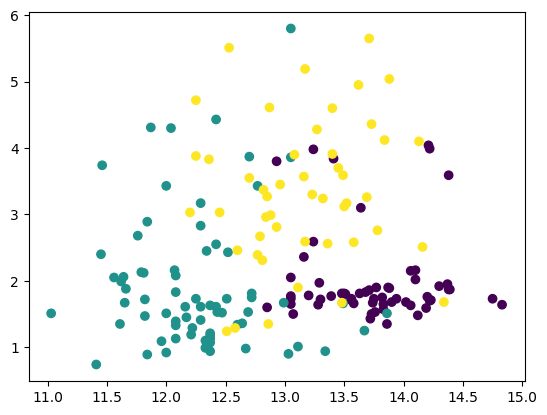

In [32]:
plt.scatter(X[:, 0], X[:,1],c=y)
plt.show()

Then we build our K-Nearest Neighbors model.

In [42]:
def knn_classifier_and_regressor(train_input, train_output, new_point, k, classifier=True):
    n = train_input.shape[0]
    distance = np.zeros(n)
    
    # Distance function
    for i in range(n):
        distance[i] = np.linalg.norm(train_input[i,:] - new_point)
    
    top_k_neighbors = np.argsort(distance)[:k]
    k_neighbor_output = train_output[top_k_neighbors]
    
    if classifier:
        voters = Counter(k_neighbor_output)
        knn_result = voters.most_common(1)[0][0]
    
    else:
        knn_result = np.mean(k_neighbor_output)
    
    return knn_result

Apply our model on the red wine dataset with all variables, we could see the prediction accuracy is .685, which is not high. The former plot reminds us to choose variables to increase accuracy.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")

The prediction accuracy is: 0.685


We could choose the first two columns of dataset 'fixed acidity' and 'volatile acidity' as our variables. The prediction accuracy increases to .87.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")

The prediction accuracy is: 0.87


Since the ranges of different features vary, then we could try to scale the dataset to explore the efficiency of this data processing method.

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We first use two variables 'fixed acidity' and 'volatile acidity' on the scaled dataset to make classification. According to the result, we could see it makes slightly decrease.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")

The prediction accuracy is: 0.852


Then we apply all variables to make prediction on the scaled dataset. We could see the prediction accuracy increases a lot. According to this exploration, we could learn that scaling data is necessary, and it efficiently increase the prediction accuracy.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")


The prediction accuracy is: 0.981


### How to determine $k$ in K-Nearest Neighbors method?

$k$ is vital in this algorithm, in this part, we explore how $k$ affect the accuracy of the model.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

n_train = X_train.shape[0]

accuracy_list = []
for k in range(1, n_train+1):
    predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=k,
                                          classifier=True)
              for new_point in X_test]

    accuracy_rate = np.sum(predictions==y_test)/len(y_test)
    accuracy_list.append(accuracy_rate)

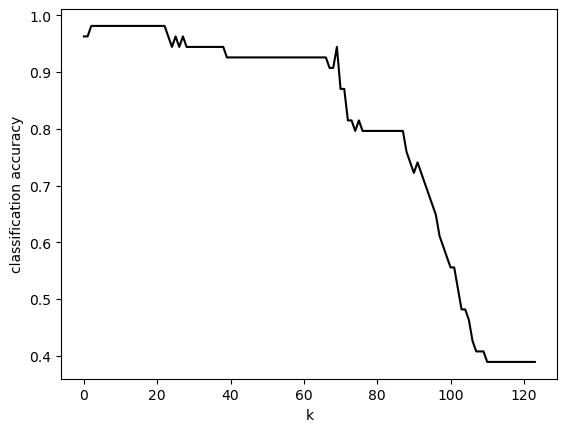

In [62]:
plt.plot(accuracy_list, c='k')
plt.xlabel('k')
plt.ylabel('classification accuracy')
plt.show()

According to the plot, we could see this model has a good performance when $k<20$, then the accuracy decreases.

### Improvement

To make improvement of the model, we could apply some variable selection method like forward or backward selection to make simpler model.